# Observations and Insights 

## Quartiles, Outlier and Boxplots Analysis

When summarising final tumour volumes, as shown in the box plot graph below, out of the main four drug regimens only Capomulin and Ramicane managed to reduce tumor volume over time. Their average final tumour volumes were approximately 38 to 39mm3, when initial tumour volumes were 45mm3 large. Interestingly mouses treated with Infubinol had no tumour sizes decrease over the time period barring one. Shown to have a finishing tumour volume of roughly 35mm3 and is seen to be the only potential outlier out of all mouses within the main four regimens tested.

## Line Plots Analysis

When looking at the outputted line plot below of Capomulin treated mouse "l509", the tumour growth seems steadily grow for the initial half of the allocated time period of 20 days peaking at 48mm3. 3mm3 above the initial size. But then finally declines quickly dropping to a minimum size of 40mm3 after 35 days. This period of steadily inclination before the downswing could indicate the time it takes for Capomulin to take effect on tumour volume. After the 35 day period however the tumour does resume to grow steadily again. Potentially indicating after around 35 days the effect of Capomulin on tumour size wears off.

## Scatterplots, Correlation and Linear Regression Analysis

By interpreting the scatterplot and line of best fit in the graph at the bottom, there seems to be a strong positive linear correlation between size of the mouse and average tumour volume over the couse of the treatment period. Positing a correlation coefficent of 0.84. The larger the mouse, the higher the expected tumour volume will be over every point in time.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
mouse_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
mice_count = len(mouse_merge["Mouse ID"].unique())
mice_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_ID = duplicate_ID["Mouse ID"].unique()
duplicate_ID = pd.Series(duplicate_ID)
duplicate_ID

0    g989
dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

for ID in duplicate_ID:
    duplicate_mouse = mouse_merge.loc[mouse_merge["Mouse ID"] == ID, :]

duplicate_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
for ID in duplicate_ID:
    clean_data = mouse_merge.loc[mouse_merge["Mouse ID"] != ID, :]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_data["Mouse ID"].unique())
mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = clean_data.groupby("Drug Regimen")
mean = pd.Series(regimen_data["Tumor Volume (mm3)"].mean())
median = pd.Series(regimen_data["Tumor Volume (mm3)"].median())
std = pd.Series(regimen_data["Tumor Volume (mm3)"].std())
variance = std * std
sem = pd.Series(regimen_data["Tumor Volume (mm3)"].sem())

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean, "Median Tumor Volume": mean,"Variance Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,"Tumor Volume Std. Err.": sem})
regimen_summary_stats


,Mean Tumor Volume,Median Tumor Volume,Variance Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = clean_data.groupby("Drug Regimen")
mean = pd.Series(regimen_data["Tumor Volume (mm3)"].mean())
median = pd.Series(regimen_data["Tumor Volume (mm3)"].median())
std = pd.Series(regimen_data["Tumor Volume (mm3)"].std())
variance = std * std
sem = pd.Series(regimen_data["Tumor Volume (mm3)"].sem())
# This method produces everything in a single groupby function (agg)
regimen_data.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

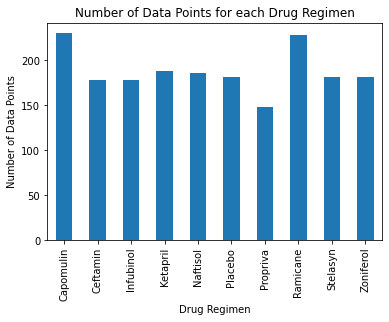

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#create data set that holds count of data points for each drug regimen
trials = pd.Series(regimen_data["Tumor Volume (mm3)"].count())

pandas_bar = trials.plot(kind='bar')
pandas_bar.set_ylabel("Number of Data Points")
pandas_bar.set_title("Number of Data Points for each Drug Regimen")
print("")

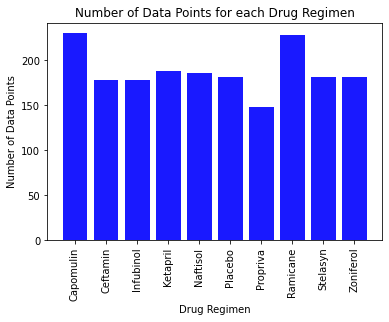

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#creating relevant data set and defining x and y variables
trials = pd.Series(regimen_data["Tumor Volume (mm3)"].count())
regimens = list(trials.index.values)
x_axis = np.arange(len(trials))
tick_locations = [value for value in x_axis]
#bar plotting and labels
plt.bar(x_axis, trials, color='b', alpha=0.9, align="center")
plt.xticks(tick_locations, regimens, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for each Drug Regimen")
plt.show()


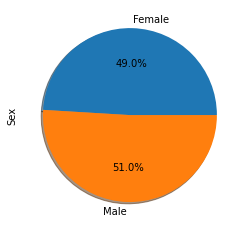

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_data.groupby("Sex")
sex_count = pd.Series(sex_data["Sex"].count())
pandas_pie = sex_count.plot(kind='pie', subplots=True, shadow = True, autopct='%1.1f%%')


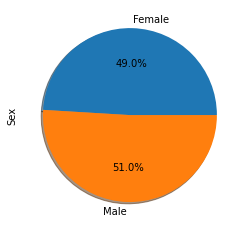

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = pd.Series(sex_data["Sex"].count())
sexes = list(sex_count.index.values)
plt.pie(sex_count, labels=sexes, autopct="%1.1f%%", shadow=True,)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
big4 = clean_data.loc[((clean_data["Drug Regimen"] == 'Capomulin') |
    (clean_data["Drug Regimen"] == 'Ramicane')|
    (clean_data["Drug Regimen"] == 'Infubinol')|
    (clean_data["Drug Regimen"] == 'Ceftamin')), :] 

# Start by getting the last (greatest) timepoint for each mouse
max_time = big4.groupby(["Mouse ID"])['Timepoint'].max()
max_time = pd.DataFrame(max_time)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max = pd.merge(max_time, clean_data,on=['Mouse ID','Timepoint'])

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
   # Locate the rows which contain mice on each drug and get the tumor volumes
   final_tumor_vol = merged_max.loc[merged_max["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
   # add subset
   tumor_vol_list.append(final_tumor_vol)
   # Determine outliers using upper and lower bounds
   quartiles = final_tumor_vol.quantile([.25,.5,.75])
   lowerq = quartiles[0.25]
   upperq = quartiles[0.75]
   iqr = upperq-lowerq
   lower_bound = lowerq - (1.5*iqr)
   upper_bound = upperq + (1.5*iqr)
   outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
   print(f"{drug} values above {upper_bound} could be outliers.")
   print(f"{drug} values below {lower_bound} could be outliers.") 
   print(f"{drug}'s potential outliers (Index, Outlier): {outliers}")
   print('-------------------------------------------------------------------------------------') 

Capomulin values above 51.83201549 could be outliers.
Capomulin values below 20.70456164999999 could be outliers.
Capomulin's potential outliers (Index, Outlier): Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------------
Ramicane values above 54.30681135 could be outliers.
Ramicane values below 17.912664470000003 could be outliers.
Ramicane's potential outliers (Index, Outlier): Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------------
Infubinol values above 82.74144559000001 could be outliers.
Infubinol values below 36.83290494999999 could be outliers.
Infubinol's potential outliers (Index, Outlier): 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
-------------------------------------------------------------------------------------
Ceftamin values above 87.66645829999999 could be outliers.
Ceftamin values below 25.35

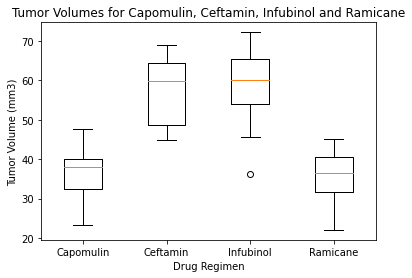

In [17]:

# Create lists of the four drug regimens for plotting
maxs = merged_max.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].apply(list)
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(maxs)
ax1.set_xticklabels(["Capomulin",'Ceftamin','Infubinol','Ramicane'])
ax1.set_title("Tumor Volumes for Capomulin, Ceftamin, Infubinol and Ramicane")
ax1.set_xlabel("Drug Regimen")


plt.show()

## Line and Scatter Plots

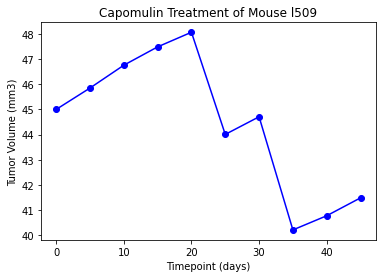

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#generate dataset for a single mouse, then define x and y variable for plotting
capomulin_mouse = clean_data.loc[clean_data["Mouse ID"] == "l509", :]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]
timepoints = clean_data["Timepoint"].unique()
#plot and labels
sine_handle, = plt.plot(timepoints, tumor_volume, marker ='o', color='b')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment of Mouse l509')
plt.show()

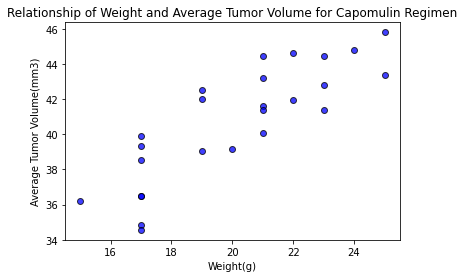

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == 'Capomulin', :]
capomulin_data = capomulin_data.groupby("Mouse ID")
#define x and y variables
weight = capomulin_data["Weight (g)"].mean()
volume = capomulin_data["Tumor Volume (mm3)"].mean()
#plot and label
plt.scatter(weight, volume, marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Relationship of Weight and Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumour volume (mm3) is 0.84.


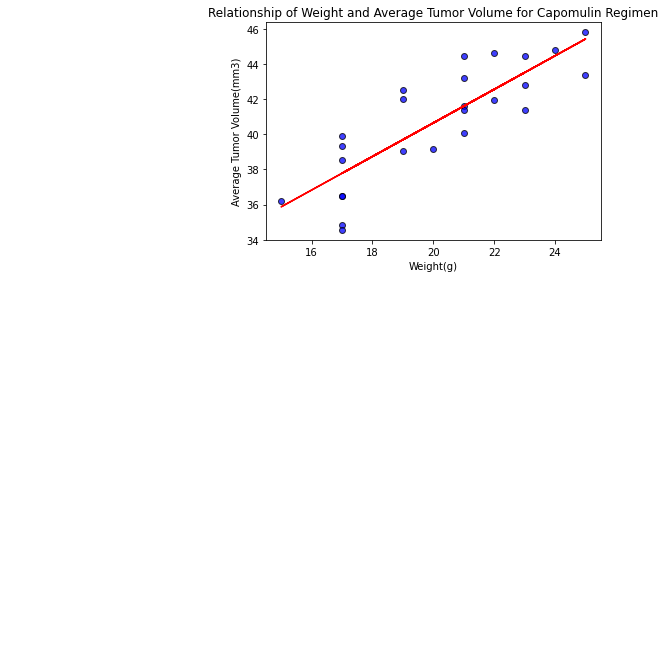

In [20]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(weight, volume)
#output to show relationship between mouse weight and average tumour volum (mm3)
print(f"The correlation between mouse weight and average tumour volume (mm3) is {round(correlation[0],2)}.")

#linear regressions model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(weight,regress_values,"r-")

#scatter plot and labeling
plt.scatter(weight, volume, marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title("Relationship of Weight and Average Tumor Volume for Capomulin Regimen")
plt.show()

